In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error,r2_score
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor 
import catboost as cb

In [2]:
## Reading the dataset  and setting the DataFrame

df = pd.read_csv('Dataset.hub.csv')
pd.set_option('display.max_columns', None)
df

Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0              0  02-02-2024              2.079               NaN   
1              1  01-02-2024              2.050          161340.0   
2              2  31-01-2024              2.100          142860.0   
3              3  30-01-2024              2.077          139750.0   
4              4  29-01-2024              2.490            3590.0   
...          ...         ...                ...               ...   
1238        1238  08-02-2019              2.583          147880.0   
1239        1239  07-02-2019              2.551          211790.0   
1240        1240  06-02-2019              2.662           98330.0   
1241        1241  05-02-2019              2.662           82250.0   
1242        1242  04-02-2019              2.660          116490.0   

      Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  \
0               72.28             NaN        3.8215          NaN   
1               73.82        577940.0        3.8535          NaN   
2               75.85        344490.0        3.9060          NaN   
3               77.82        347240.0        3.9110          NaN   
4               76.78        331930.0        3.8790          NaN   
...               ...             ...           ...          ...   
1238            52.72        621000.0        2.8140        270.0   
1239            52.64        749010.0        2.8320        320.0   
1240            54.01        606720.0        2.8400        100.0   
1241            53.66        609760.0        2.8205         90.0   
1242            54.56        622470.0        2.7975        490.0   

     Bitcoin_Price  Bitcoin_Vol. Platinum_Price  Platinum_Vol. Ethereum_Price  \
0        43,194.70         42650          901.6            NaN       2,309.28   
1        43,081.40         47690          922.3            NaN       2,304.28   
2        42,580.50         56480          932.6            NaN       2,283.14   
3        42,946.20         55130          931.7            NaN       2,343.11   
4        43,299.80         45230          938.3            NaN       2,317.79   
...            ...           ...            ...            ...            ...   
1238      3,661.70        699230          802.2            NaN         119.23   
1239      3,397.70        471360          800.8            NaN         104.55   
1240      3,404.30        514210          807.1            NaN         104.63   
1241      3,468.40        460950         821.35            NaN         107.37   
1242      3,462.80        503920          822.5            NaN          107.9   

      Ethereum_Vol. S&P_500_Price Nasdaq_100_Price  Nasdaq_100_Vol.  \
0            246890      4,958.61        17,642.73      315620000.0   
1            323610      4,906.19        17,344.71      240640000.0   
2            408790      4,848.87        17,137.24      366450000.0   
3            387120      4,924.97        17,476.71      236210000.0   
4            318840      4,927.93        17,596.27      238750000.0   
...             ...           ...              ...              ...   
1238        9190000      2,707.88         6,913.13      168040000.0   
1239        5050000      2,706.05         6,904.98      204460000.0   
1240        6150000      2,731.61         6,997.62      193600000.0   
1241        4670000      2,737.70         7,023.52      206730000.0   
1242        5020000      2,724.87         6,959.96      177350000.0   

      Apple_Price  Apple_Vol.  Tesla_Price  Tesla_Vol.  Microsoft_Price  \
0          185.85   102550000       187.91   110610000           411.22   
1          186.86    53490000       188.86    90680000           403.78   
2          184.40    54830000       187.29   102270000           397.58   
3          188.04    55270000       191.59   105540000           408.59   
4          191.73    46890000       190.93   123600000           409.72   
...           ...         ...          ...         ...              ...   
1238     

Explaination. 
1) There are 39 columns and 1243 rows of data available with us.  
2) Data contains the Price and Volume columns.  
3) From the data we contain 18 columns of the Volume Data and 19 columns of Price Data.  
4) We have 2 extra columns of Date and Series number.  
5) Data also contains the NaN values.  

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   int64  
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   int64  
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   object 
 16  Nasdaq_100_Vol.    1242 

Explaination. 
1) We are having 3 types of data Float, int, object.   
2) 19 columns are float, 12 columns are int, and 8 columns are object.  

In [4]:
df.describe()

Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
count  1243.000000        1243.000000       1239.000000      1243.000000   
mean    621.000000           3.494714     131624.116223        67.577064   
std     358.967501           1.822540      64385.141749        20.465500   
min       0.000000           1.482000       1200.000000       -37.630000   
25%     310.500000           2.347500      91900.000000        55.095000   
50%     621.000000           2.702000     127370.000000        69.230000   
75%     931.500000           4.055500     169460.000000        80.455000   
max    1242.000000           9.647000     381970.000000       123.700000   

       Crude_oil_Vol.  Copper_Price    Copper_Vol.  Bitcoin_Vol.  \
count    1.220000e+03   1243.000000    1206.000000  1.243000e+03   
mean     3.989038e+05      3.541957   35406.616915  4.033918e+07   
std      2.161619e+05      0.702819   38415.448731  2.940889e+08   
min      1.702000e+04      2.100500      10.000000  2.600000e+02   
25%      2.835975e+05      2.858750     370.000000  7.907500e+04   
50%      3.668850e+05      3.666000   10180.000000  2.153100e+05   
75%      5.072425e+05      4.137250   68340.000000  6.151050e+05   
max      1.770000e+06      4.937500  176040.000000  4.470000e+09   

       Platinum_Vol.  Ethereum_Vol.  Nasdaq_100_Vol.  Apple_Price  \
count     636.000000   1.243000e+03     1.242000e+03  1243.000000   
mean     9082.515723   1.801563e+07     2.238827e+08   125.566533   
std      8876.538587   1.326933e+08     8.246992e+07    46.114122   
min         0.000000   7.518000e+04     5.047000e+07    42.360000   
25%      1120.000000   5.883600e+05     1.715275e+08    79.505000   
50%      6070.000000   1.570000e+06     2.116200e+08   136.760000   
75%     15287.500000   9.365000e+06     2.559850e+08   162.915000   
max     42830.000000   1.790000e+09     9.825600e+08   198.110000   

         Apple_Vol.  Tesla_Price    Tesla_Vol.  Microsoft_Price  \
count  1.243000e+03  1243.000000  1.243000e+03      1243.000000   
mean   9.981845e+07   173.590442  1.341790e+08       241.240072   
std    5.208192e+07   106.688094  8.509129e+07        73.429838   
min    2.404000e+07    11.930000  2.940000e+07       105.250000   
25%    6.599000e+07    53.335000  8.136000e+07       182.525000   
50%    8.749000e+07   202.070000  1.095200e+08       245.380000   
75%    1.170750e+08   251.470000  1.578300e+08       297.120000   
max    4.268800e+08   409.970000  9.140800e+08       411.220000   

       Microsoft_Vol.  Silver_Price    Silver_Vol.  Google_Price  \
count    1.243000e+03   1243.000000    1196.000000   1243.000000   
mean     2.920801e+07     21.588977   67695.418060     99.670829   
std      1.236710e+07      3.859288   38078.851679     29.766893   
min      8.990000e+06     11.772000       0.000000     51.940000   
25%      2.153500e+07     17.998500   48150.000000     71.185000   
50%      2.610000e+07     22.758000   62940.000000    101.240000   
75%      3.317500e+07     24.512000   79100.000000    127.205000   
max      9.707000e+07     29.418000  355280.000000    153.510000   

        Google_Vol.  Nvidia_Price   Nvidia_Vol.  Berkshire_Vol.  \
count  1.243000e+03   1243.000000  1.243000e+03     1243.000000   
mean   3.351599e+07    187.285841  4.560298e+07     2426.524537   
std    1.507215e+07    134.679941  1.869107e+07     2660.497572   
min    9.310000e+06     33.450000  9.790000e+06       80.000000   
25%    2.410500e+07     73.905000  3.245000e+07      345.000000   
50%    2.973000e+07    151.590000  4.279000e+07     1510.000000   
75%    3.735500e+07    242.140000  5.511500e+07     3225.000000   
max    1.331800e+08    661.600000  1.534600e+08    13850.000000   

       Netflix_Price  Netflix_Vol.  Amazon_Price   Amazon_Vol.   Meta_Price  \
count    1243.000000  1.243000e+03   1243.000000  1.243000e+03  1243.000000   
mean      404.839541  7.057401e+06    128.683234  7.413005e+07   239.728134   
std       114.989473  6.384187

Explaination. 
1) By using the describe we can see all the basic statistics.  
2) mean, standard deviation, minimum, Percentiles and max.  

In [5]:
df.dtypes

Unnamed: 0             int64
Date                  object
Natural_Gas_Price    float64
Natural_Gas_Vol.     float64
Crude_oil_Price      float64
Crude_oil_Vol.       float64
Copper_Price         float64
Copper_Vol.          float64
Bitcoin_Price         object
Bitcoin_Vol.           int64
Platinum_Price        object
Platinum_Vol.        float64
Ethereum_Price        object
Ethereum_Vol.          int64
S&P_500_Price         object
Nasdaq_100_Price      object
Nasdaq_100_Vol.      float64
Apple_Price          float64
Apple_Vol.             int64
Tesla_Price          float64
Tesla_Vol.             int64
Microsoft_Price      float64
Microsoft_Vol.         int64
Silver_Price         float64
Silver_Vol.          float64
Google_Price         float64
Google_Vol.            int64
Nvidia_Price         float64
Nvidia_Vol.            int64
Berkshire_Price       object
Berkshire_Vol.         int64
Netflix_Price        float64
Netflix_Vol.           int64
Amazon_Price         float64
Amazon_Vol.   

In [6]:
df.isnull().sum()

Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       4
Crude_oil_Price        0
Crude_oil_Vol.        23
Copper_Price           0
Copper_Vol.           37
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        607
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           47
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              2
dtype: int64

Explaination. 
1) By using isnull.sum we can find the total number of null values in our Dataset according to there columns.  

In [7]:
df.duplicated().sum()

0

## Data Preprocessing

In [8]:
non_float = df.select_dtypes(exclude = 'float')
non_float.columns

Index(['Unnamed: 0', 'Date', 'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Apple_Vol.', 'Tesla_Vol.', 'Microsoft_Vol.', 'Google_Vol.',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Vol.',
       'Amazon_Vol.', 'Meta_Vol.', 'Gold_Price'],
      dtype='object')

Explaination. 
1) Here we can see the Data Types which are not float by using the 'select_dtypes'.  
2) We will apply the 'exclude' condition to exclude the 'float' Data Types.   
3) Data need to be in the same data type for further steps.  

In [9]:
# Converting the date column to datetime 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extracting year, month, day, and other time features
df['Year'] = df['Date'].dt.year.astype('float')
df['Month'] = df['Date'].dt.month.astype('float')
df['Day'] = df['Date'].dt.day.astype('float')


# Drop original date column if not needed
df = df.drop(columns=['Date'])

# Check the resulting dataframe
df

Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
0              0              2.079               NaN            72.28   
1              1              2.050          161340.0            73.82   
2              2              2.100          142860.0            75.85   
3              3              2.077          139750.0            77.82   
4              4              2.490            3590.0            76.78   
...          ...                ...               ...              ...   
1238        1238              2.583          147880.0            52.72   
1239        1239              2.551          211790.0            52.64   
1240        1240              2.662           98330.0            54.01   
1241        1241              2.662           82250.0            53.66   
1242        1242              2.660          116490.0            54.56   

      Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  Bitcoin_Vol.  \
0                NaN        3.8215          NaN     43,194.70         42650   
1           577940.0        3.8535          NaN     43,081.40         47690   
2           344490.0        3.9060          NaN     42,580.50         56480   
3           347240.0        3.9110          NaN     42,946.20         55130   
4           331930.0        3.8790          NaN     43,299.80         45230   
...              ...           ...          ...           ...           ...   
1238        621000.0        2.8140        270.0      3,661.70        699230   
1239        749010.0        2.8320        320.0      3,397.70        471360   
1240        606720.0        2.8400        100.0      3,404.30        514210   
1241        609760.0        2.8205         90.0      3,468.40        460950   
1242        622470.0        2.7975        490.0      3,462.80        503920   

     Platinum_Price  Platinum_Vol. Ethereum_Price  Ethereum_Vol.  \
0             901.6            NaN       2,309.28         246890   
1             922.3            NaN       2,304.28         323610   
2             932.6            NaN       2,283.14         408790   
3             931.7            NaN       2,343.11         387120   
4             938.3            NaN       2,317.79         318840   
...             ...            ...            ...            ...   
1238          802.2            NaN         119.23        9190000   
1239          800.8            NaN         104.55        5050000   
1240          807.1            NaN         104.63        6150000   
1241         821.35            NaN         107.37        4670000   
1242          822.5            NaN          107.9        5020000   

     S&P_500_Price Nasdaq_100_Price  Nasdaq_100_Vol.  Apple_Price  Apple_Vol.  \
0         4,958.61        17,642.73      315620000.0       185.85   102550000   
1         4,906.19        17,344.71      240640000.0       186.86    53490000   
2         4,848.87        17,137.24      366450000.0       184.40    54830000   
3         4,924.97        17,476.71      236210000.0       188.04    55270000   
4         4,927.93        17,596.27      238750000.0       191.73    46890000   
...            ...              ...              ...          ...         ...   
1238      2,707.88         6,913.13      168040000.0        42.60    95280000   
1239      2,706.05         6,904.98      204460000.0        42.73   126970000   
1240      2,731.61         6,997.62      193600000.0        43.56   112960000   
1241      2,737.70         7,023.52      206730000.0        43.55   144410000   
1242      2,724.87         6,959.96      177350000.0        42.81   125980000   

      Tesla_Price  Tesla_Vol.  Microsoft_Price  Microsoft_Vol.  Silver_Price  \
0          187.91   110610000           411.22        28260000        22.796   
1          188.86    90680000           403.78        29230000        23.236   
2          187.29   102270000           397.58        46780000        23.169   
3          191.59   105540000           408.59        2934

Explaination. 
1) We have converted the "Date" column to the date time.  
2) Extracting the "Year" from the "Date" as a seperate column using ".dt.year" as datetime function.  
3) Extracting the "Month" from the "Date" as a seperate column using ".dt.month" as datetime function.  
4) Extracting the "Day" from the "Date" as a seperate column using ".dt.day" as datetime function.  

In [10]:
## Dropping the unnecessary columns
# axis = 1 is used to define the column and inplace = True to permanently delete the column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
# replacing the "," with blanks and converitng to numeric format
ds = df.replace({',':''}, regex=True)
ds = ds.apply(pd.to_numeric)


Explaination
1) Here we have converted all the non numeric columns to numeric
2) replace is used to replace , with blanks 

## 2. EDA (Exploratory Data Analysis)


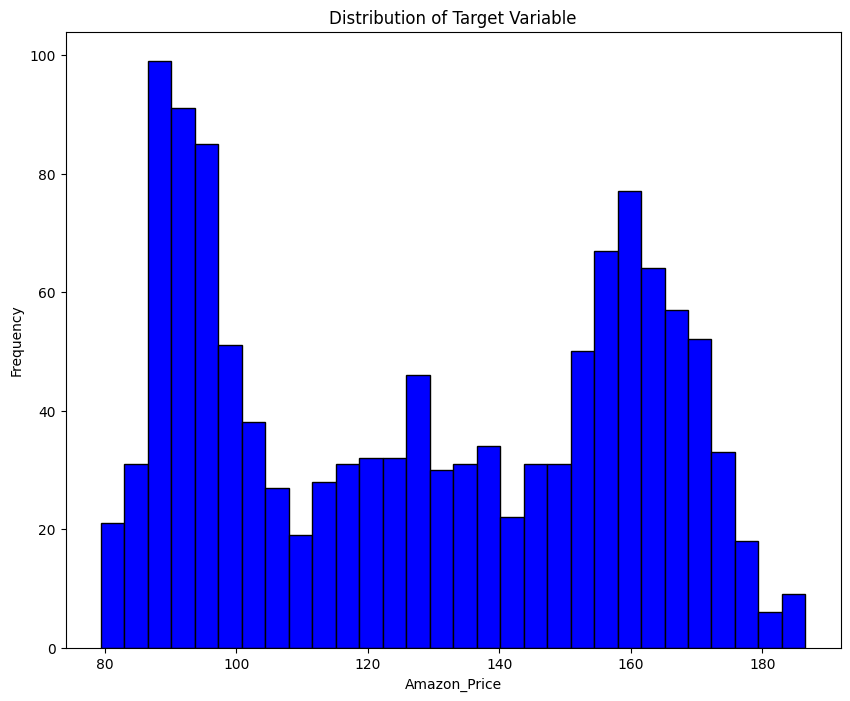

In [12]:
plt.figure(figsize=(10, 8))
plt.hist(ds['Amazon_Price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Target Variable')
plt.xlabel('Amazon_Price')
plt.ylabel('Frequency')
plt.show()

Explaination. 
1) Price Range of the Amazon varies between 80 to 180.  
2) Frequency of the Amazon varies between 0 to 100.  
3) We can clearly see that Frequency is more between the Price range of 80 to 100.  
4) Between 120 t0 140 Frequency is stable.  
5) Frequency is lowest when the Price range is more than 180.  
6) After 160 the Frequency is getting low.  
7) Max Frequency is 100 and Minimum is near 10 to 15.  

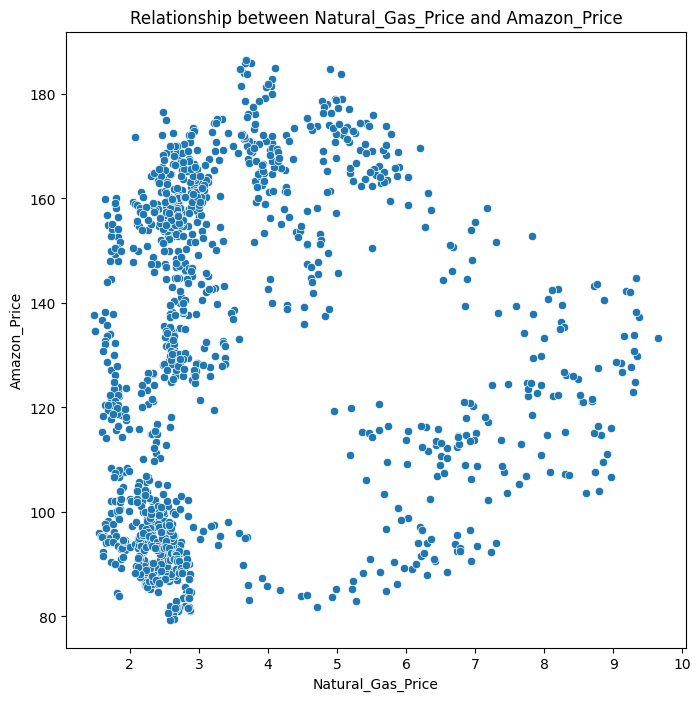

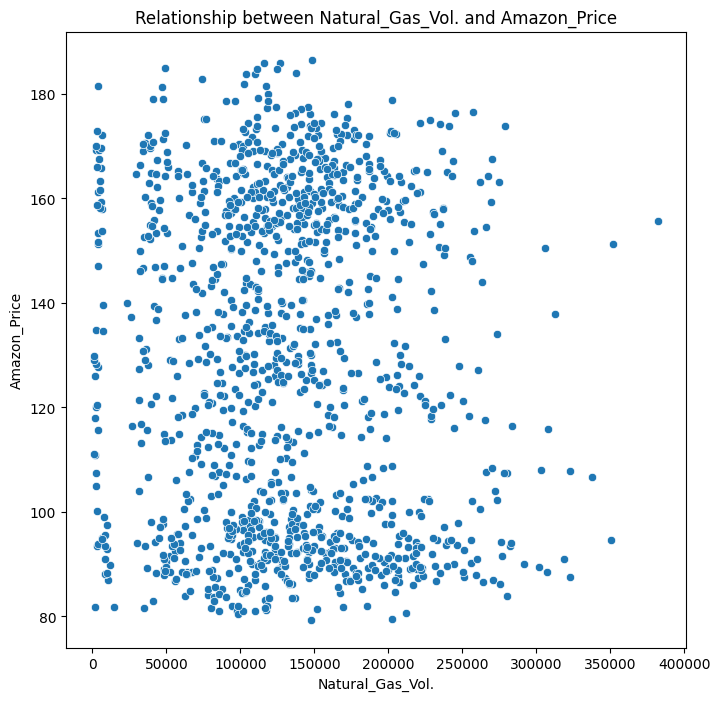

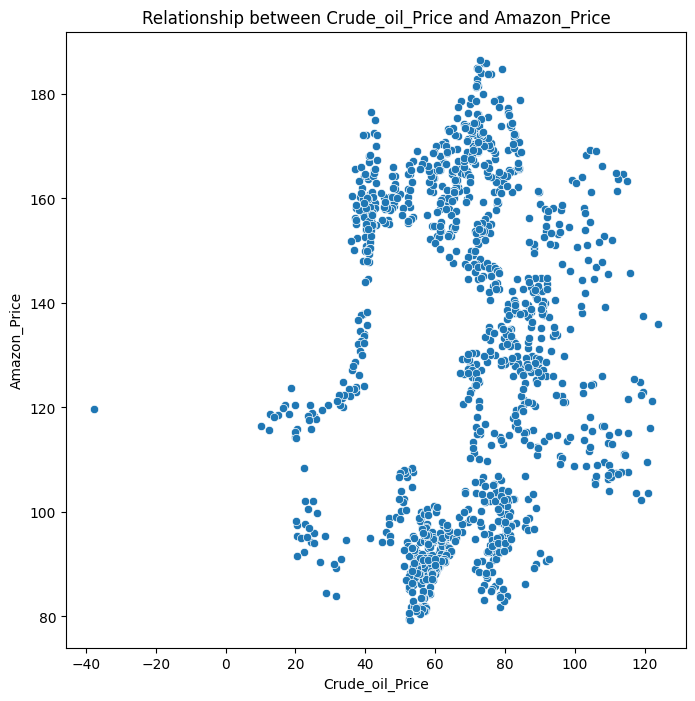

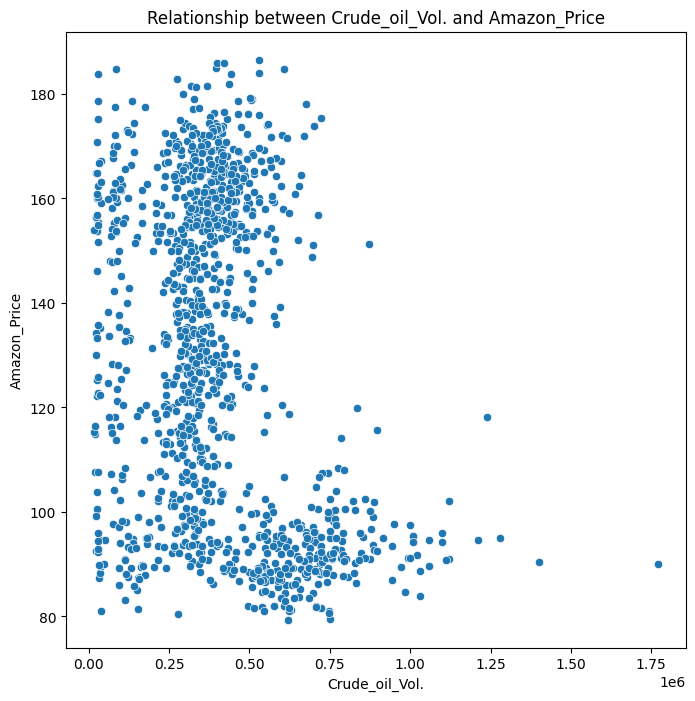

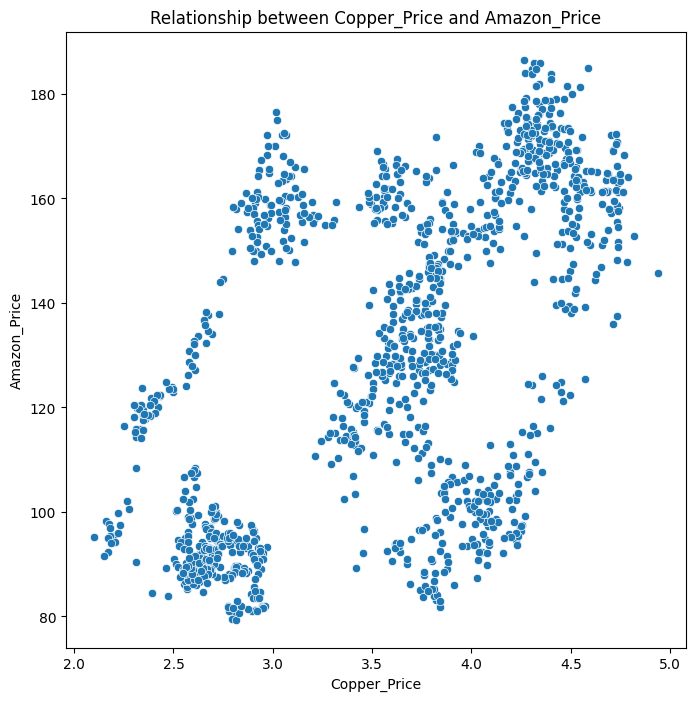

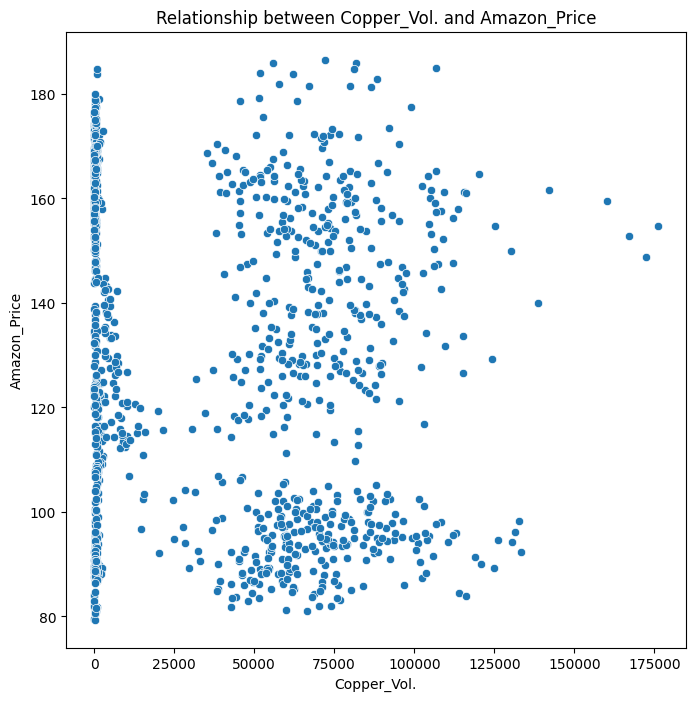

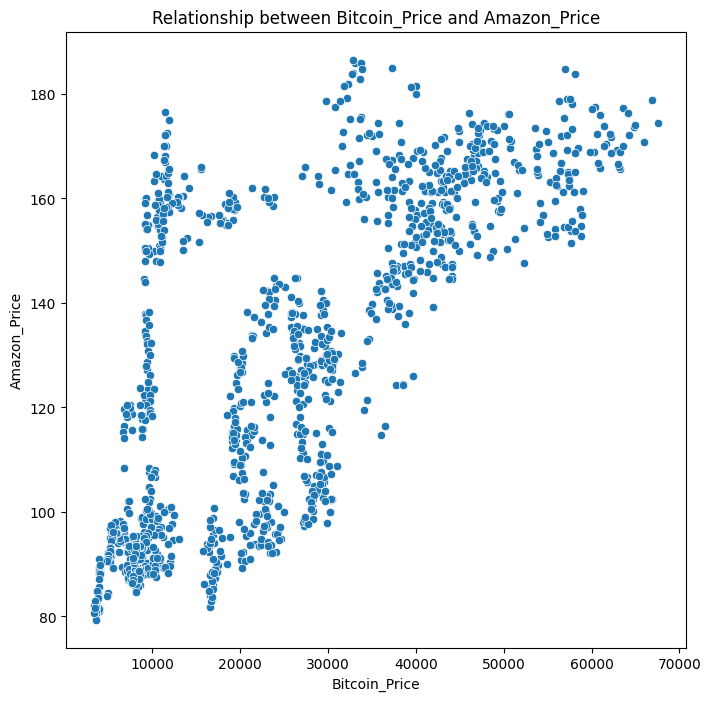

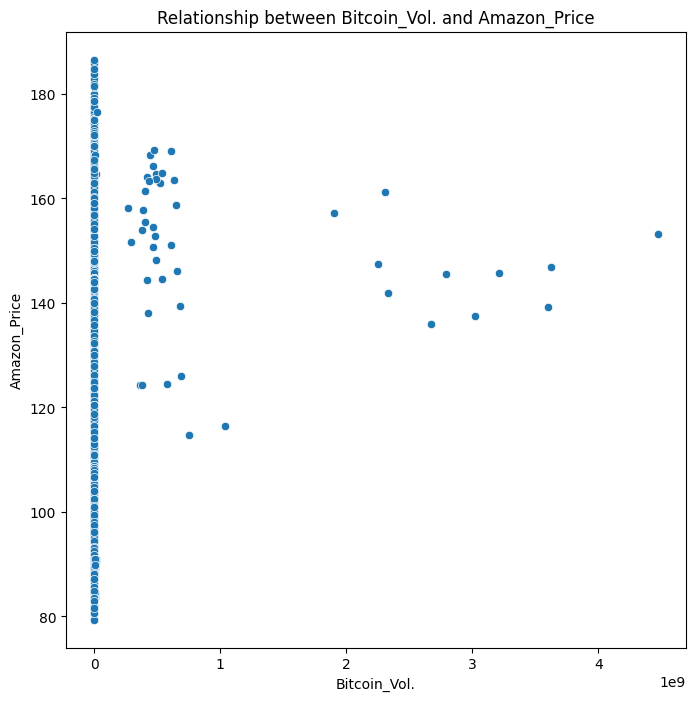

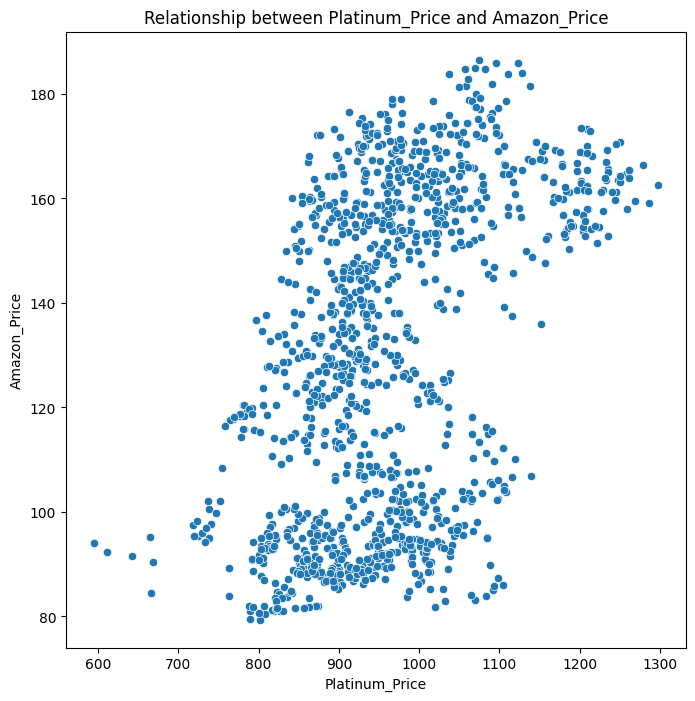

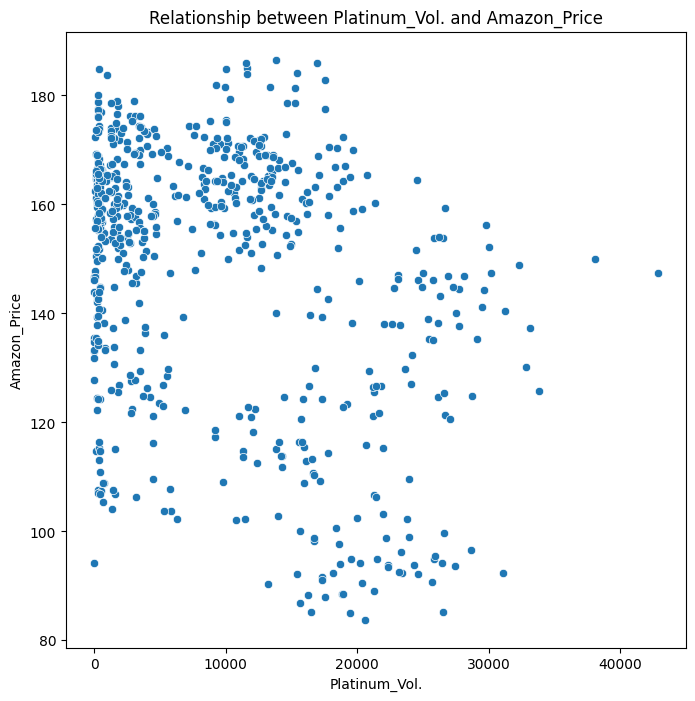

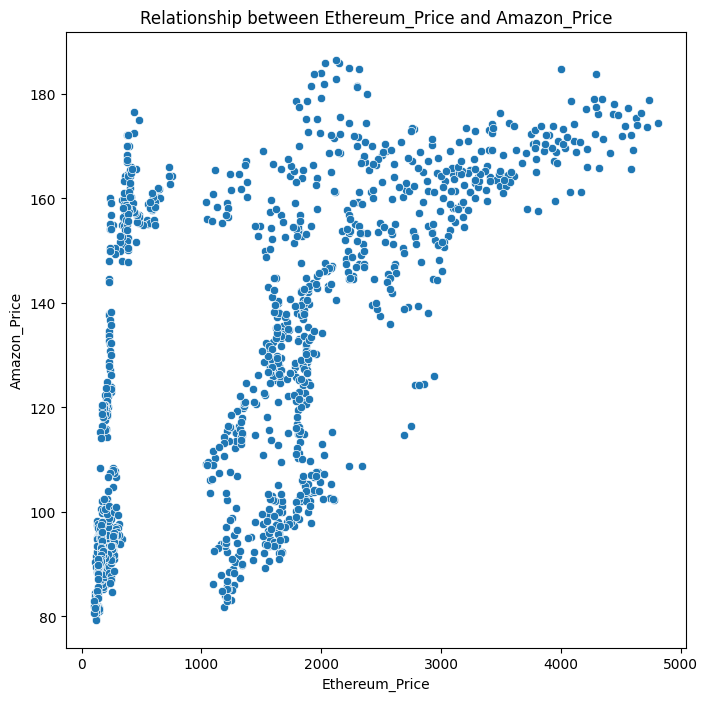

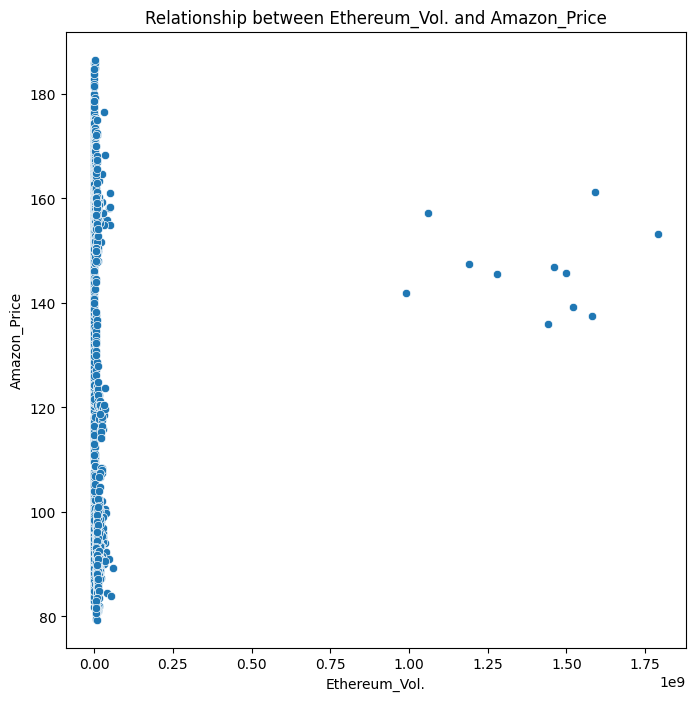

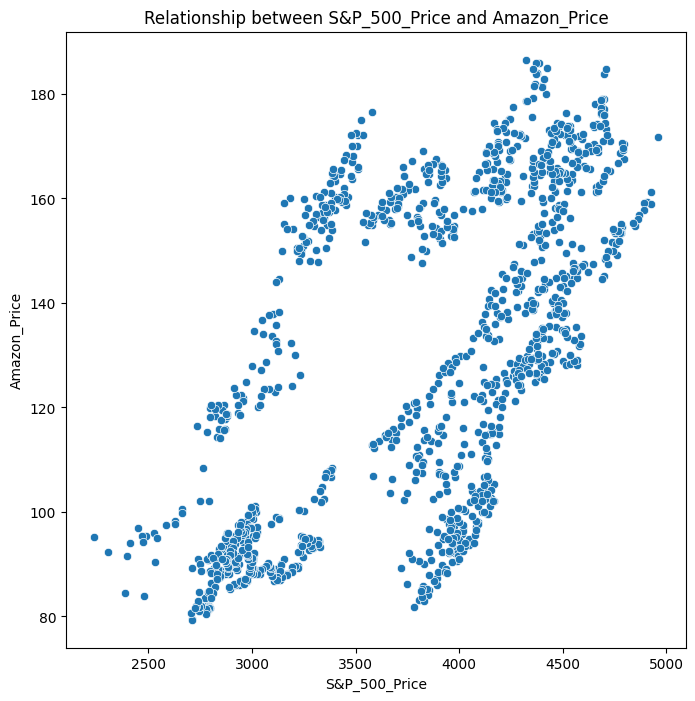

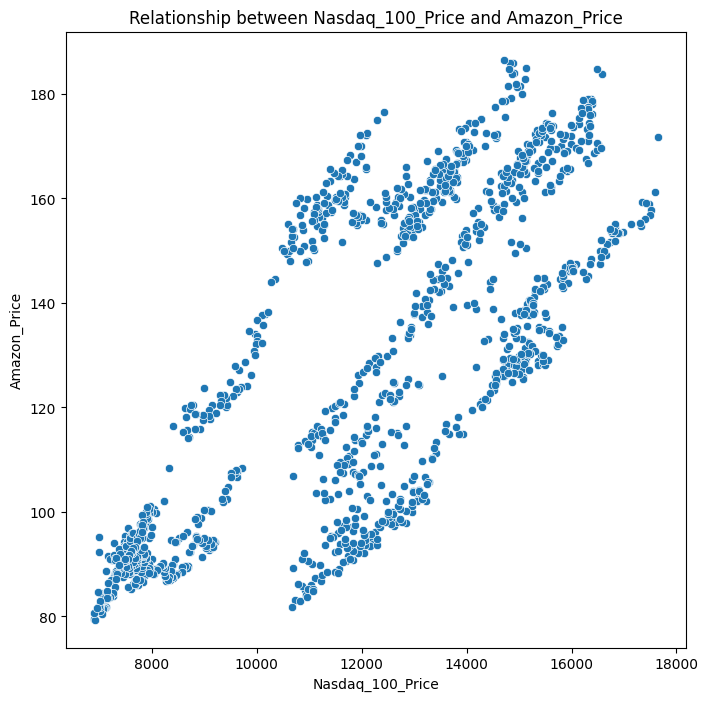

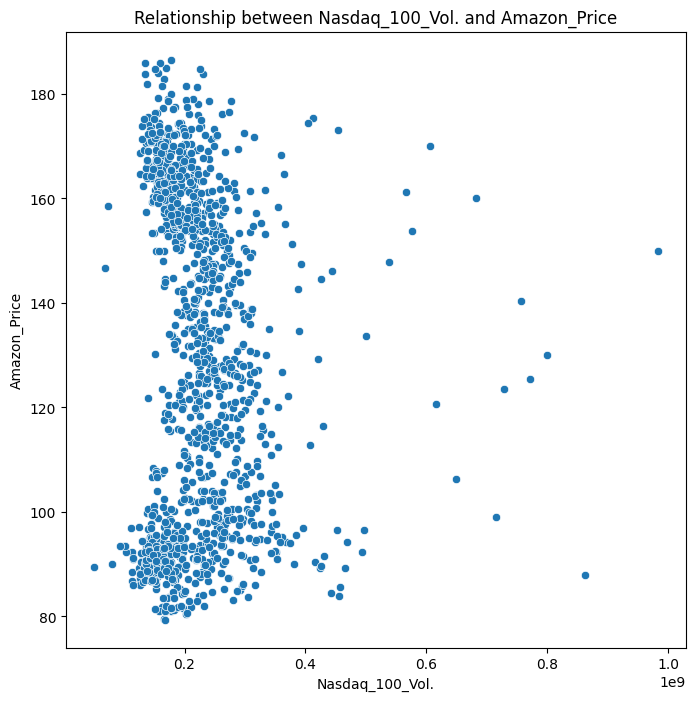

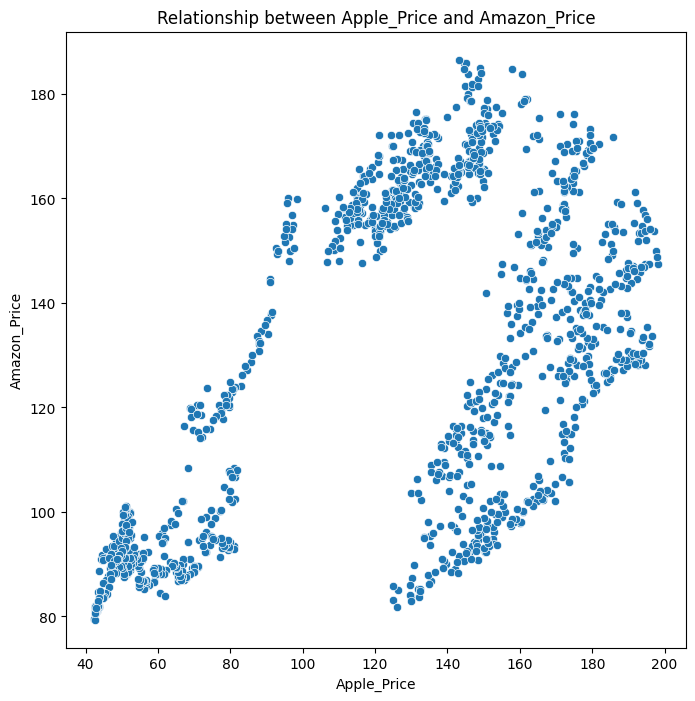

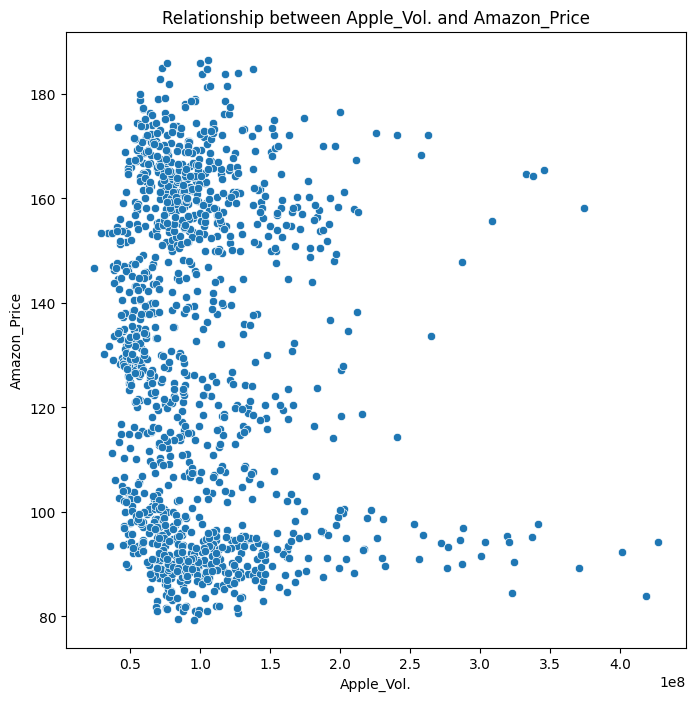

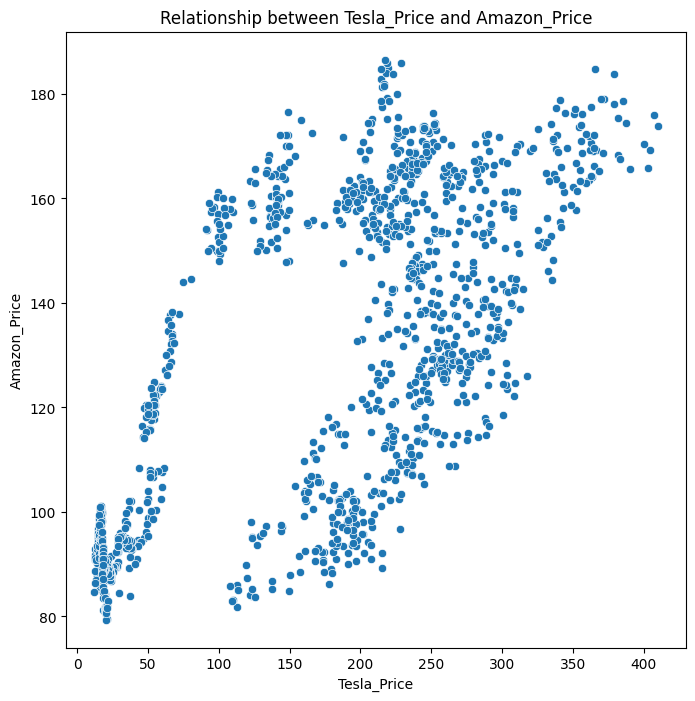

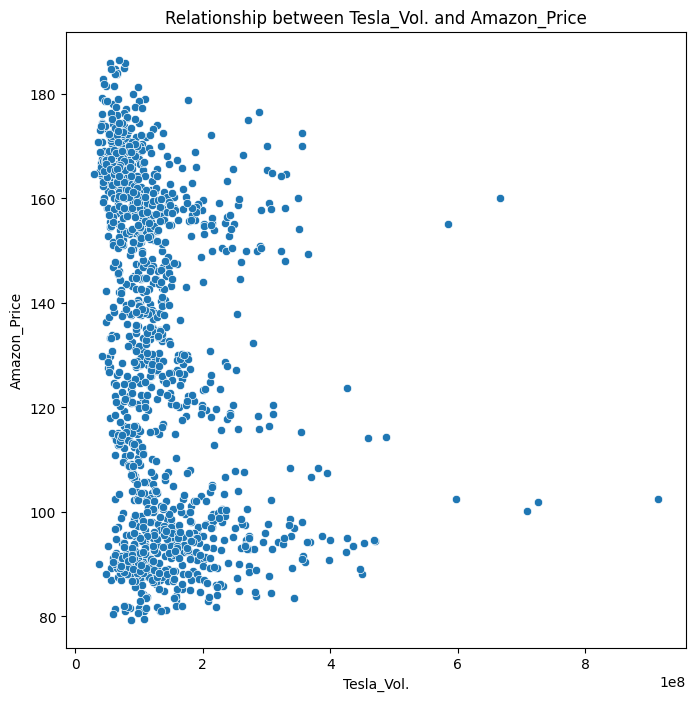

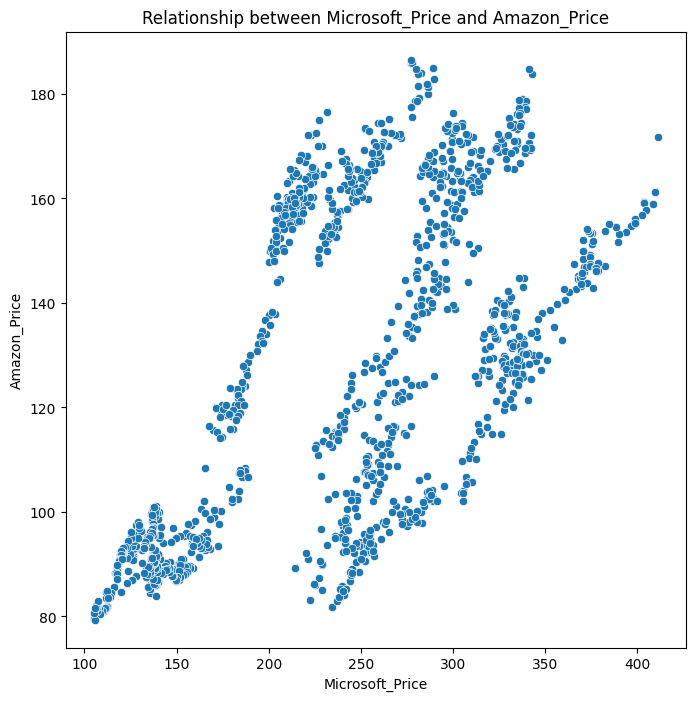

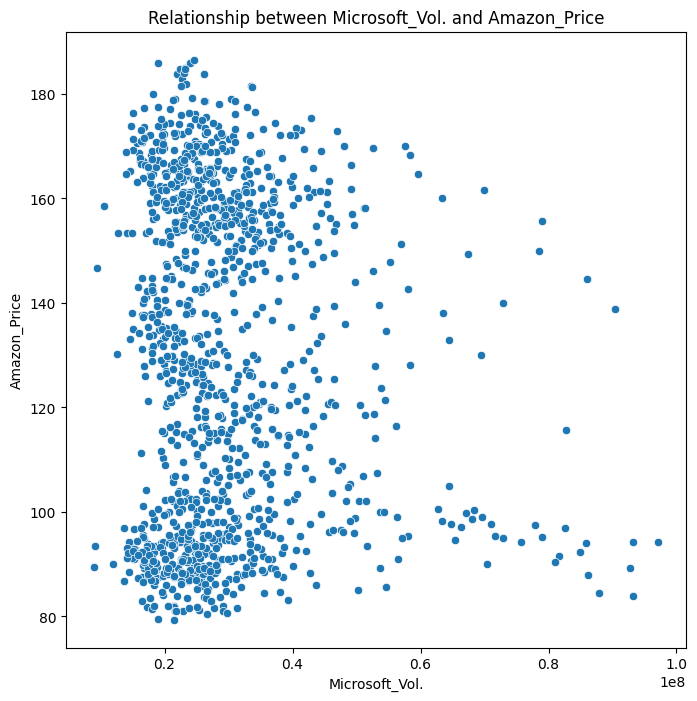

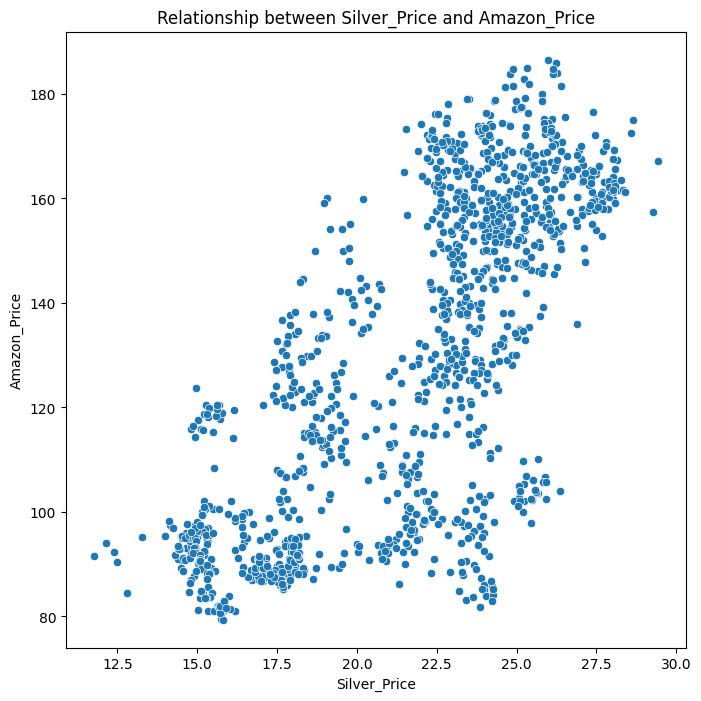

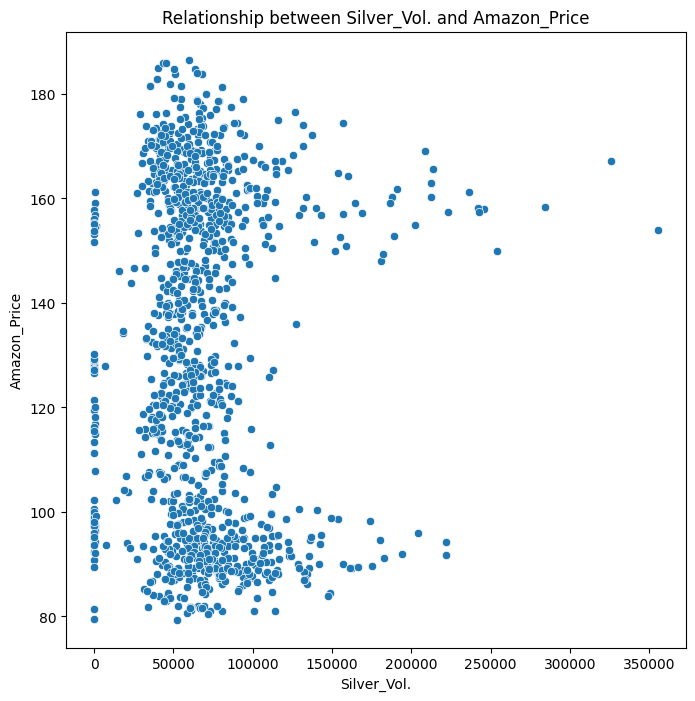

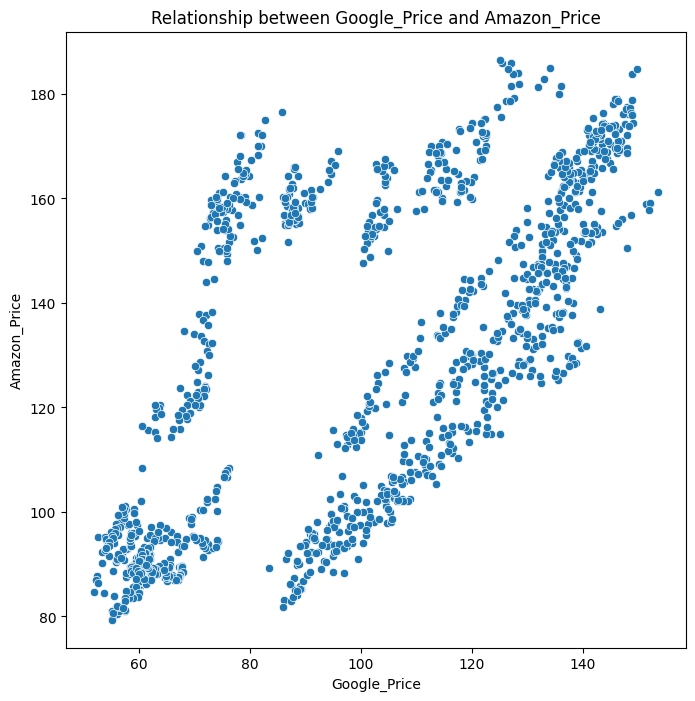

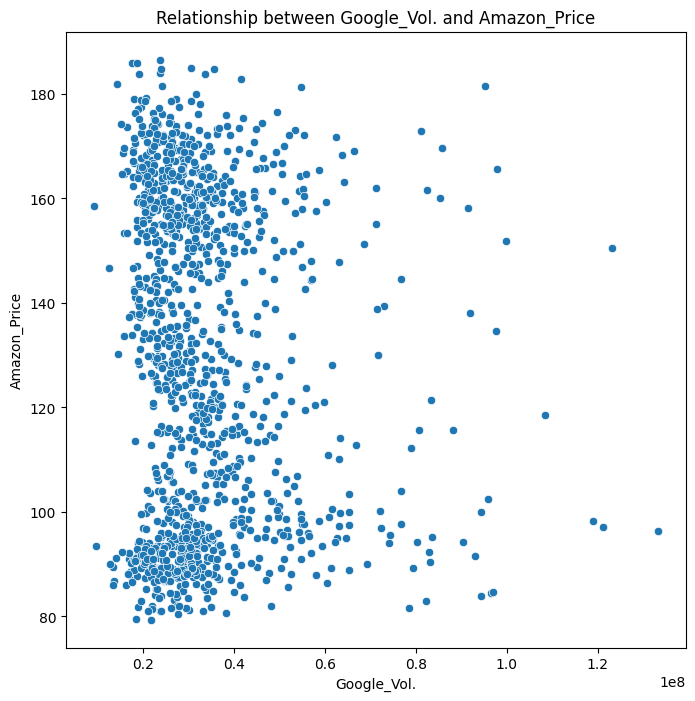

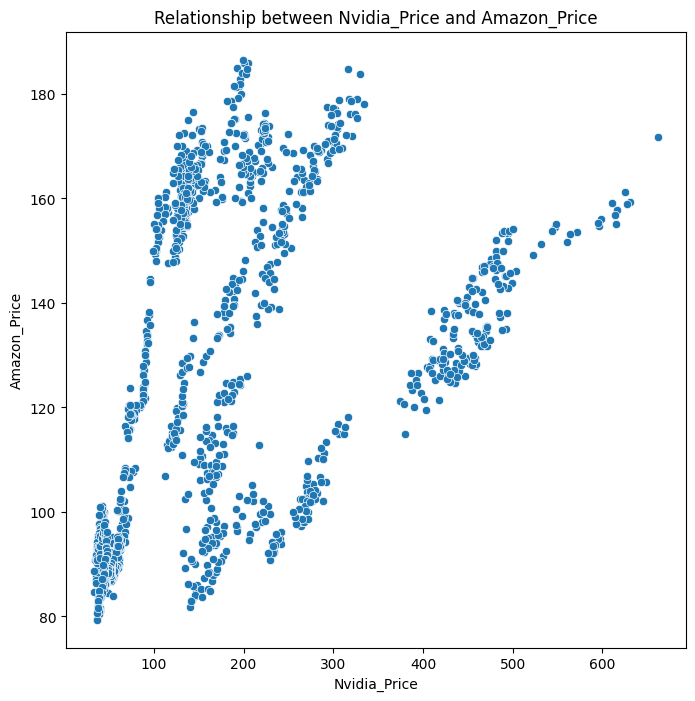

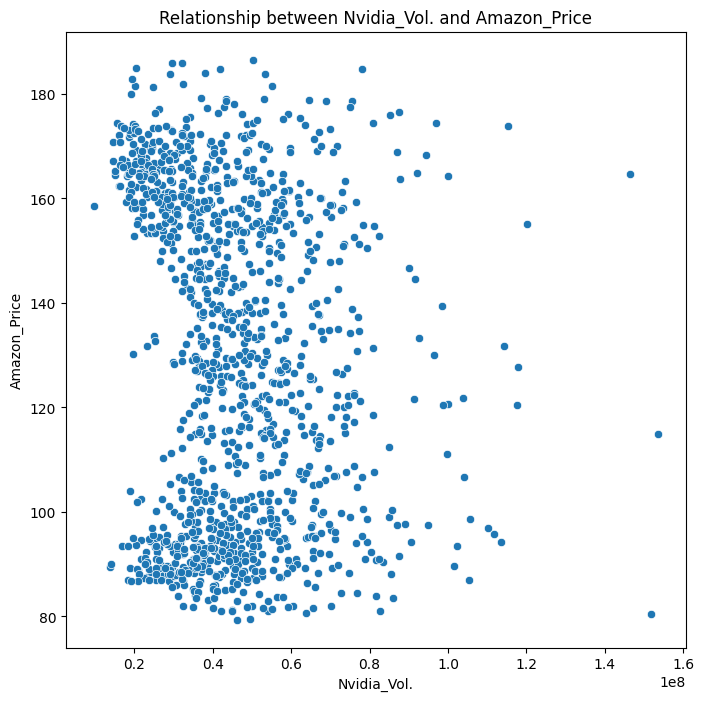

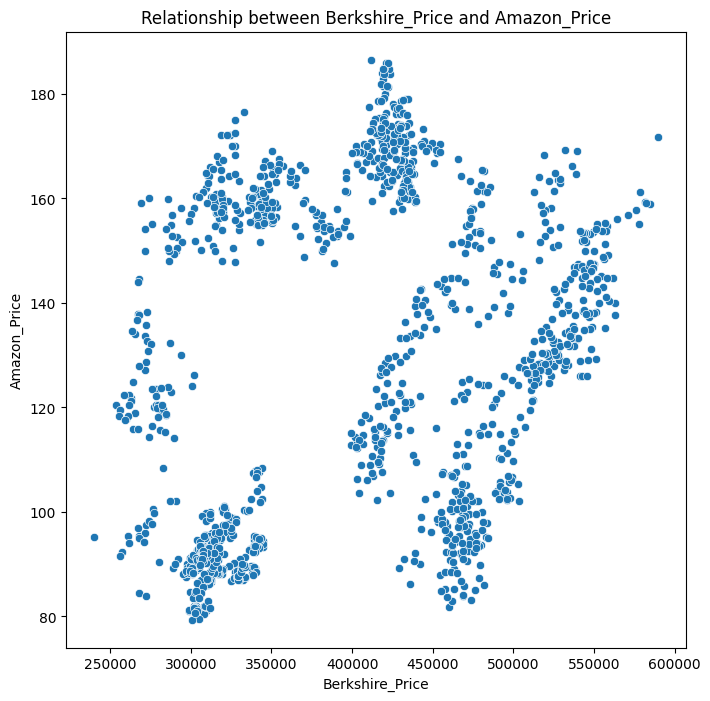

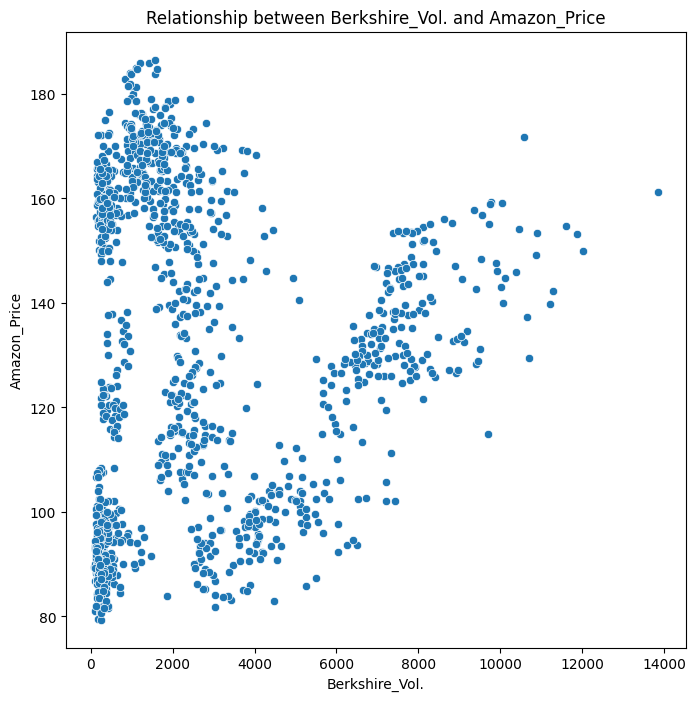

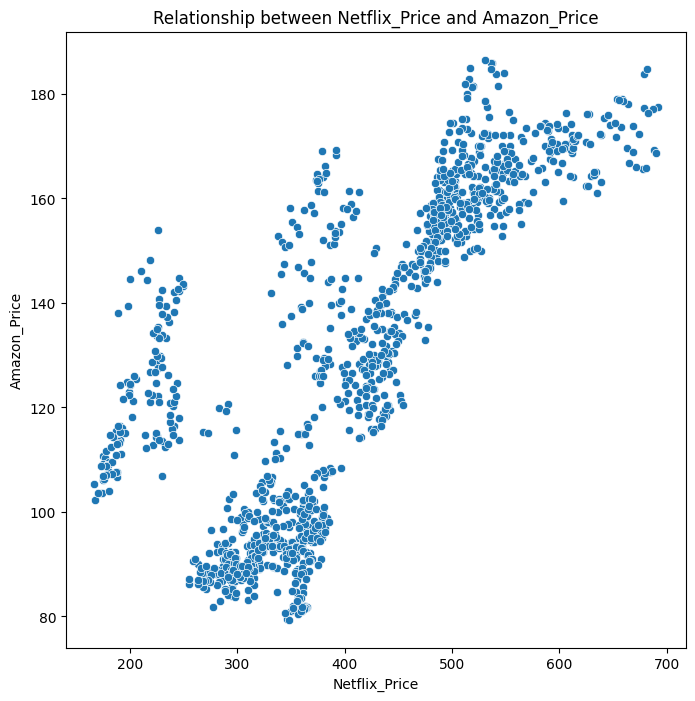

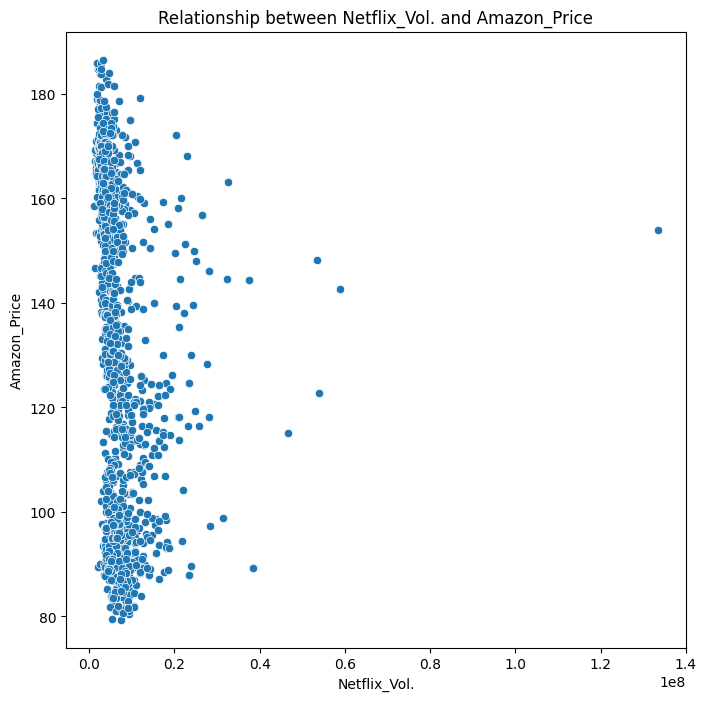

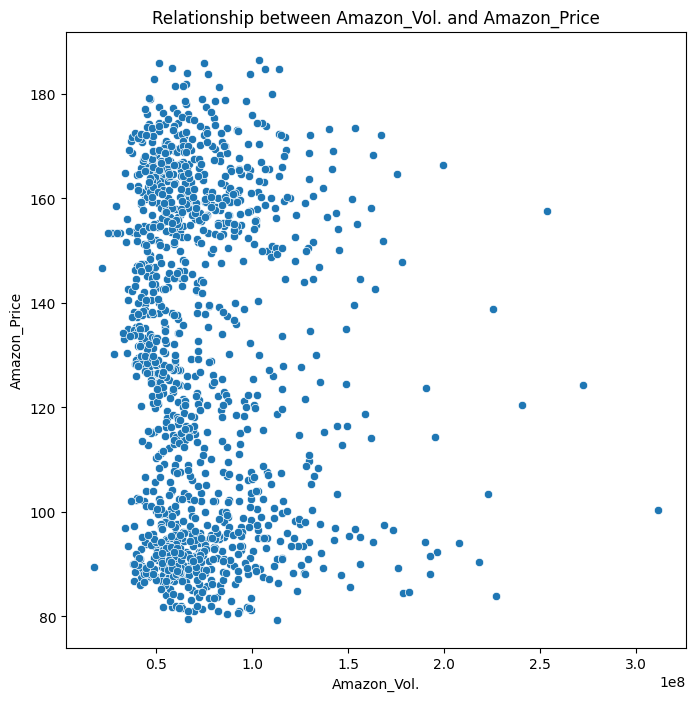

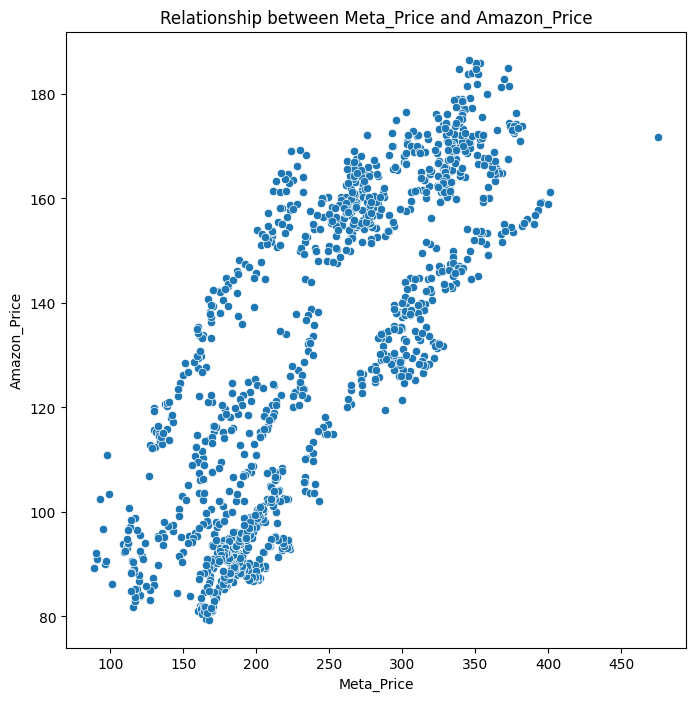

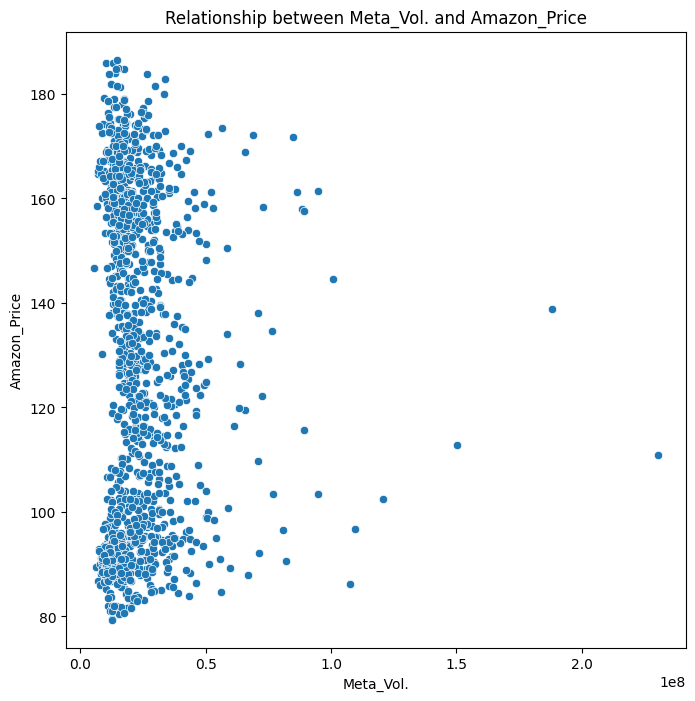

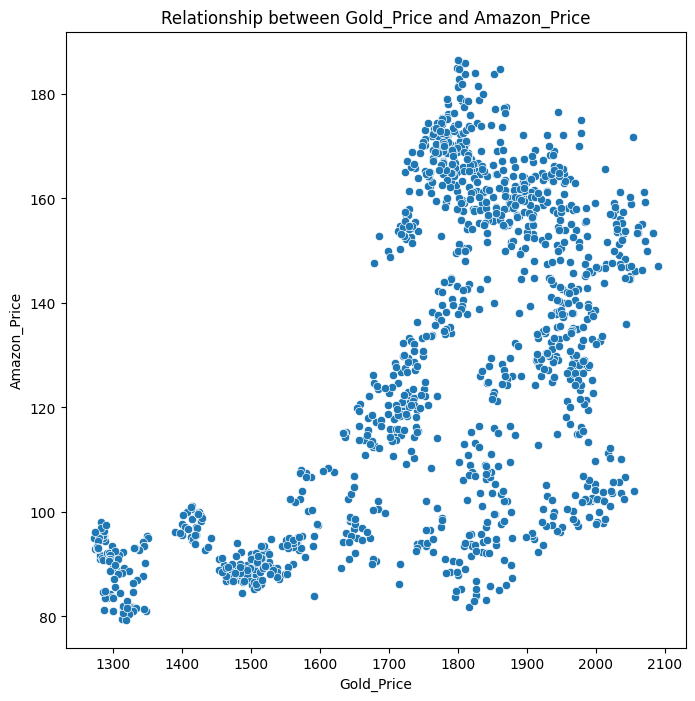

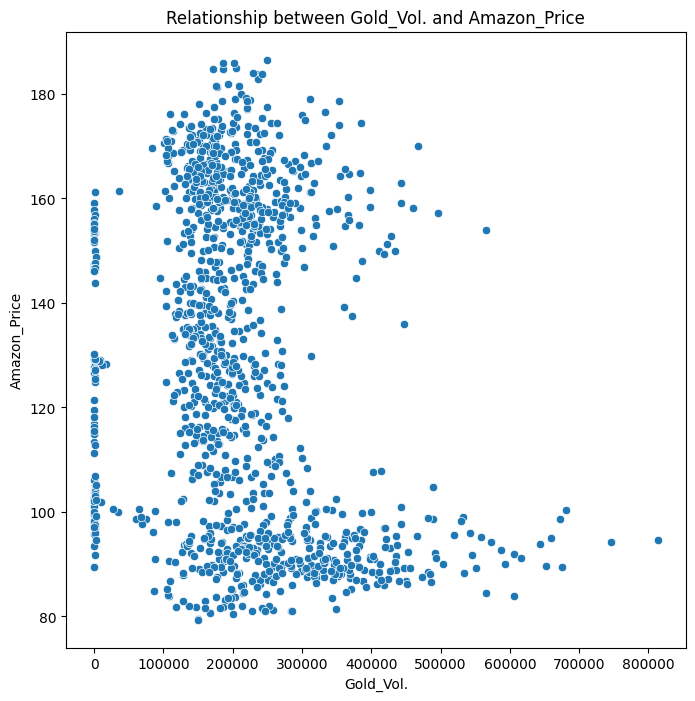

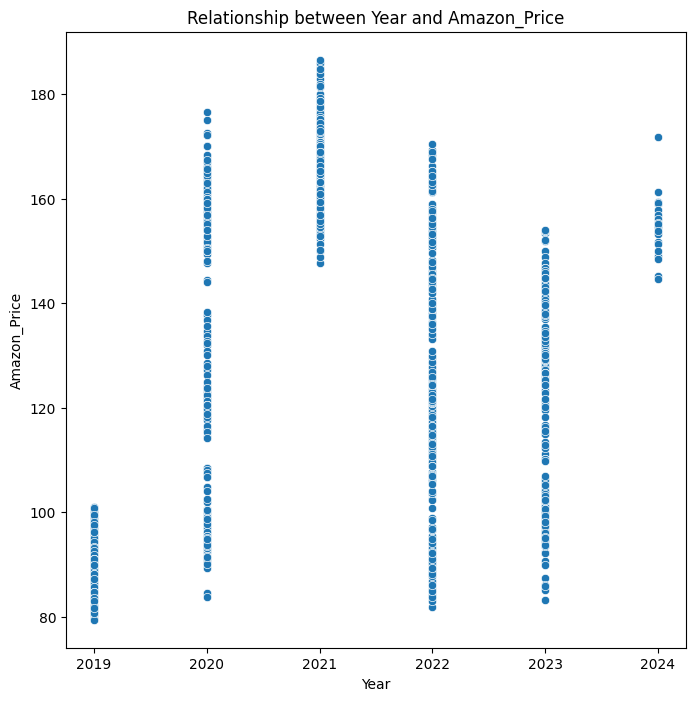

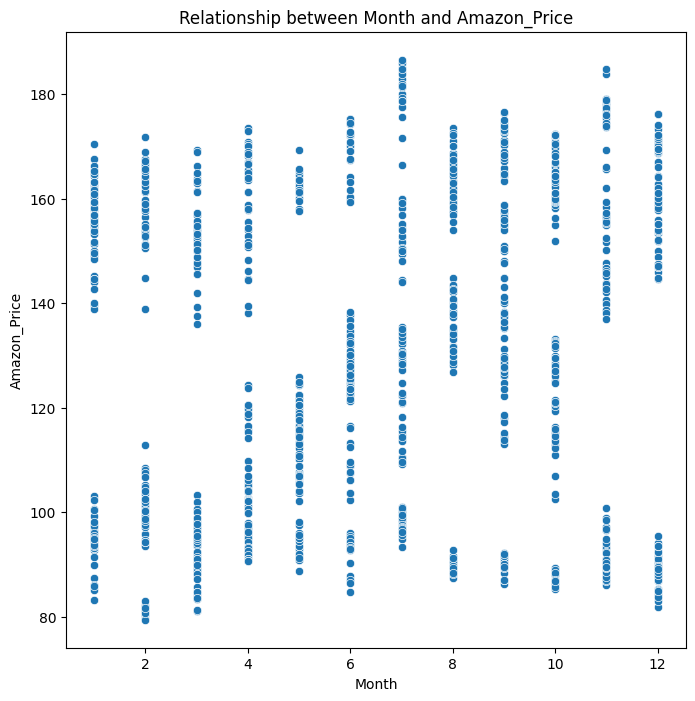

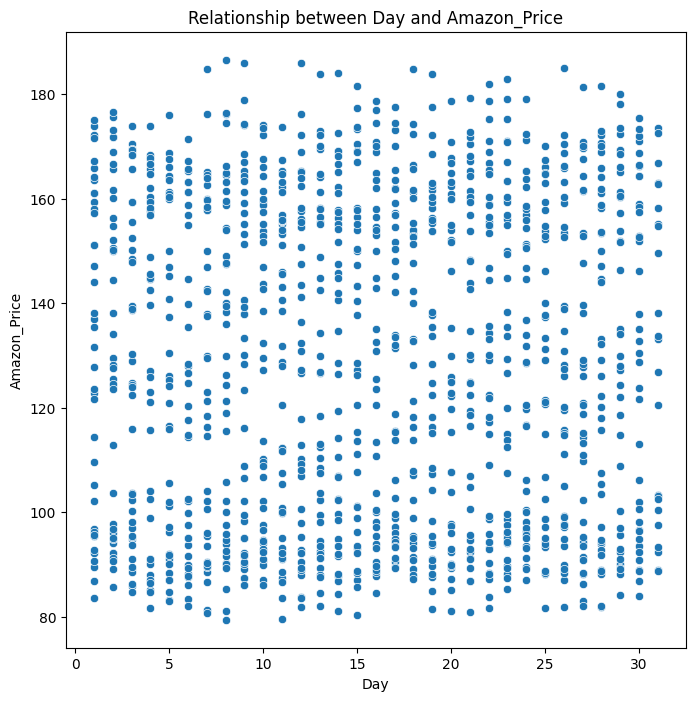

In [13]:
# 	Analyzing relationships between Amazon_Price and other features.
Target_feature = 'Amazon_Price'
for column in ds.columns:
    
    if column != Target_feature:
        plt.figure(figsize=(8, 8))
        sns.scatterplot(x=ds[column], y=ds[Target_feature])
        plt.title(f'Relationship between {column} and {Target_feature}')
        plt.xlabel(column)
        plt.ylabel(Target_feature)
        plt.show()

Explaination. 
1) Here we can see the relation between the Amazon and other feature.  
2) Clusters have been form for the feature which are correlated with the Amazon.  
3) From the graphs we can see that there are also some outliers due to which some of the features are not much correlated.  
4) On the Y-axis we have our target variable and on the X-axis we have another feature.  
5) We can see both positive and negaitve correlation.  
6) Positive Correlation- When the points rise from left to right, the relationship is positive (as x increases, y increases).  
7) Negative Correlation- When the points fall from left to right, the relationship is negative (as x increases, y decreases).

In [14]:
# Defining a new vaiable for the correlation of the dataset
correlation_matrix = ds.corr()

# Getting the correlation of all features with the target variable
target_corr = correlation_matrix['Amazon_Price'].sort_values(ascending=False)

# Display the correlation values
target_corr

Amazon_Price         1.000000
Meta_Price           0.795618
Netflix_Price        0.770758
Nasdaq_100_Price     0.754037
Silver_Price         0.733125
Bitcoin_Price        0.716299
Tesla_Price          0.688165
Google_Price         0.665685
Ethereum_Price       0.632728
S&P_500_Price        0.630431
Microsoft_Price      0.599515
Gold_Price           0.592969
Copper_Price         0.579606
Apple_Price          0.552444
Platinum_Price       0.463763
Nvidia_Price         0.407860
Berkshire_Price      0.279611
Year                 0.250780
Natural_Gas_Price    0.129552
Month                0.127261
Berkshire_Vol.       0.089812
Crude_oil_Price      0.082066
Bitcoin_Vol.         0.079938
Ethereum_Vol.        0.034377
Day                  0.011965
Silver_Vol.          0.003200
Meta_Vol.           -0.034181
Natural_Gas_Vol.    -0.058512
Nasdaq_100_Vol.     -0.064014
Microsoft_Vol.      -0.074436
Copper_Vol.         -0.086681
Amazon_Vol.         -0.088988
Apple_Vol.          -0.100603
Google_Vol

Explaination. 
1) Here we have computed the correlation.  
2) We can see that there are both positive and negative correlation.  
3) All the price features are showing the positive correlation.  
4) Most of the volume features are showing the negative correlation.  
5) Meta and Netflix are showing the highest correlation.  
6) Crude oil volume and Platinum volume is showing the negative correlation.  


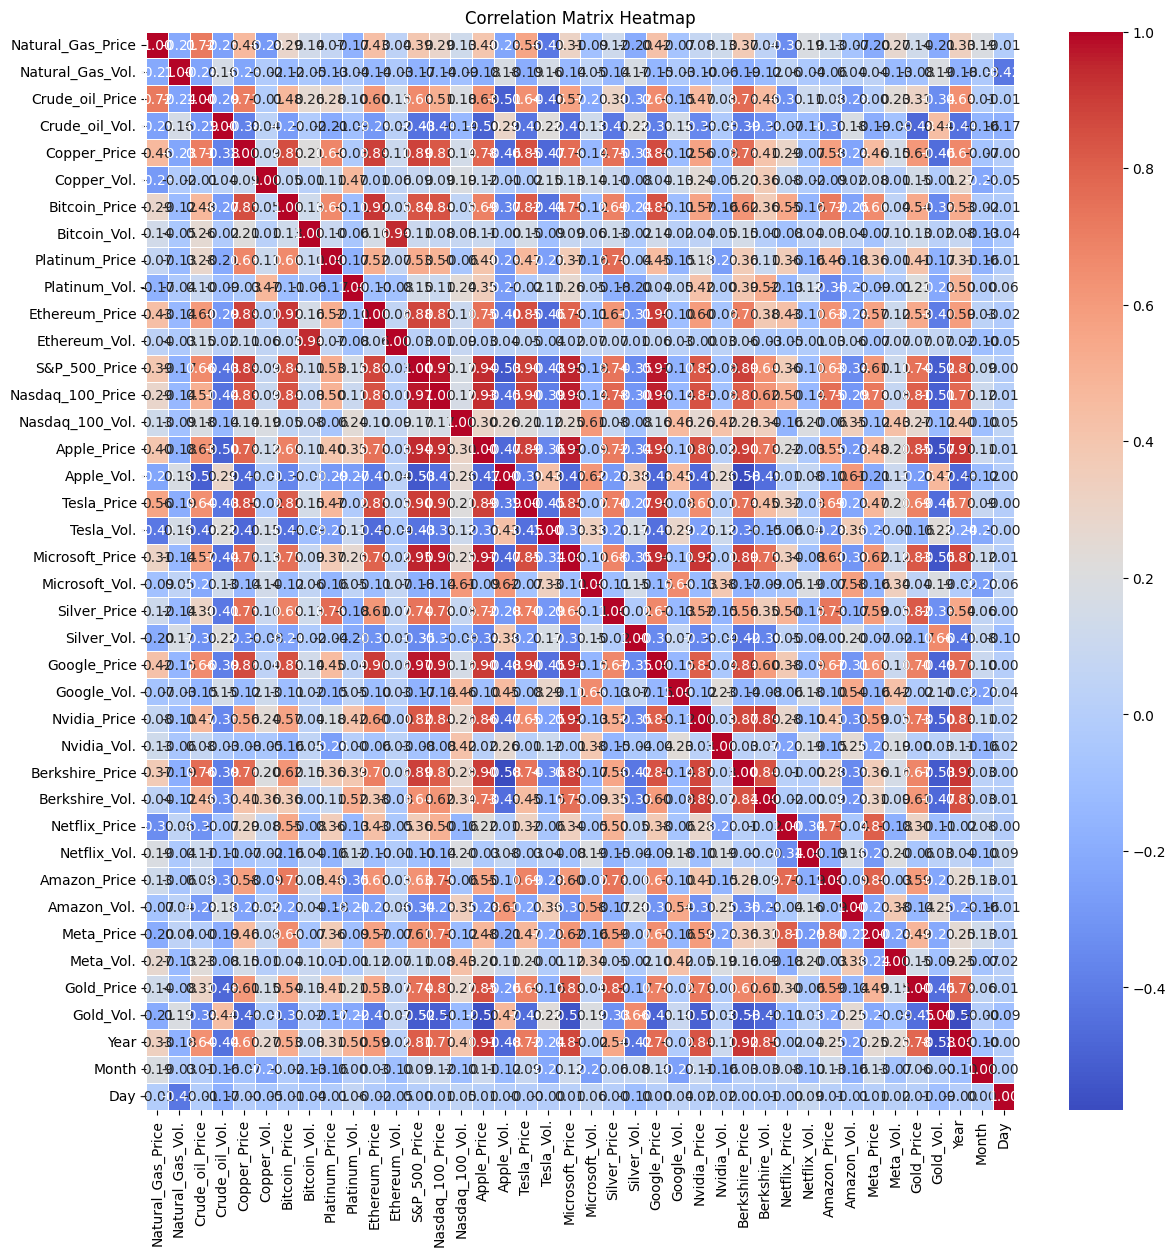

In [15]:
target_corr = ds.corr()

# Plotting
plt.figure(figsize=(14, 14))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

## Feature Engineering

# Handling null values

In [16]:
null_col = [feature for feature in ds.columns if ds[feature].isnull().sum()]
for feature in null_col:
    print('{}:{} missing values'.format(feature,ds[feature].isnull().sum()))

Natural_Gas_Vol.:4 missing values
Crude_oil_Vol.:23 missing values
Copper_Vol.:37 missing values
Platinum_Vol.:607 missing values
Nasdaq_100_Vol.:1 missing values
Silver_Vol.:47 missing values
Gold_Vol.:2 missing values


Explaination. 
1) Here we have used the for loop to find the null values using ".isnull.sum" function.  
2) Printing the null values with the defined format.

In [17]:
# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # For numerical columns
imputer

SimpleImputer()

Explaination
1) Here we have used the SimpleImputer for filling in the missing values
2) strategy involves the value whith which we have to fill the  missing values as "mean"

In [18]:
# Fit and transform the DataFrame
ds = imputer.fit_transform(ds)

# Convert the result back to a DataFrame
ds = pd.DataFrame(ds, columns=df.columns)


Explaination 
1) Here we have filled all the missing values 
2) As we got the array so we have converted it into the dataframe 

## Model Development.

In [19]:
# Splitting the data for training and testing.
X = ds.drop(columns=['Amazon_Price'],axis = 1) # Independent features
y = ds['Amazon_Price']                  # Dependent / Target feature


Explaination. 
1) Here we have divided our data in X and Y.  
2) In the variable X there is full data except target feature or dependent feature which is "Amazon_Price".  
3) And in the Y variable there is only the target feature (dependent feature ) which is "Amazon_Price".

In [20]:
# Splitting the data in training and testing set at 80-20 ration.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training features shape: (994, 39)
Test features shape: (249, 39)
Training target shape: (994,)
Test target shape: (249,)


In [21]:
X_train

Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  Crude_oil_Vol.  \
1072              2.303          207410.0            52.75        549020.0   
96                2.644          127780.0            90.77        315000.0   
1183              2.575           94250.0            63.91        750490.0   
881               1.746          138350.0            40.29        426970.0   
178               2.592          186290.0            71.86         80860.0   
...                 ...               ...              ...             ...   
1044              2.647          223570.0            56.77        516830.0   
1095              2.445          218510.0            56.26        682300.0   
1130              2.306          148940.0            57.62        712540.0   
860               2.152          175920.0            42.67        397830.0   
1126              2.312          168620.0            56.22         24300.0   

      Copper_Price  Copper_Vol.  Bitcoin_Price  Bitcoin_Vol.  Platinum_Price  \
1072        2.5770      49610.0         8198.6      604740.0          881.85   
96          3.8010      56100.0        26601.0       36470.0          929.50   
1183        2.9040      64720.0         5320.8      697420.0          891.40   
881         2.9325      83110.0         9253.4      453830.0          843.85   
178         3.6895      60350.0        26828.0       63390.0         1066.30   
...            ...          ...            ...           ...             ...   
1044        2.6265        760.0         8661.2      515430.0          882.85   
1095        2.5900        650.0        10568.2      504450.0          991.30   
1130        2.7000      67460.0         9424.8     1050000.0          844.20   
860         2.8990        220.0        11557.2      549590.0          966.10   
1126        2.7220      66570.0        10412.5      591270.0          850.90   

      Platinum_Vol.  Ethereum_Price  Ethereum_Vol.  S&P_500_Price  \
1072    9082.515723          179.87     10950000.0        2938.79   
96     31240.000000         1641.31       194290.0        4450.32   
1183    9082.515723          161.80      9570000.0        2945.83   
881     9082.515723          240.50      7070000.0        3197.52   
178     9082.515723         1800.99       311240.0        4198.05   
...             ...             ...            ...            ...   
1044    9082.515723          185.25      9570000.0        3096.63   
1095    9082.515723          174.79      7550000.0        2937.78   
1130    9082.515723          198.87     14520000.0        3004.04   
860      450.000000          387.12      8590000.0        3380.35   
1126    9082.515723          217.27      8600000.0        2985.03   

      Nasdaq_100_Price  Nasdaq_100_Vol.  Apple_Price   Apple_Vol.  \
1072           7725.13      130610000.0        56.77  123560000.0   
96            15202.40      756250000.0       175.01  109260000.0   
1183           7781.46      195630000.0        50.17  186140000.0   
881           10689.52      212710000.0        97.06  170990000.0   
178           13834.62      276880000.0       175.05   65090000.0   
...                ...              ...          ...          ...   
1044           8257.83      132490000.0        65.66   89580000.0   
1095           7719.25      152710000.0        52.30   76870000.0   
1130           7927.08      139650000.0        51.12   67470000.0   
860           11157.72      179140000.0       113.01  165940000.0   
1126           7905.12      149000000.0        51.80   89110000.0   

      Tesla_Price   Tesla_Vol.  Microsoft_Price  Microsoft_Vol.  Silver_Price  \
1072        15.85  121300000.0           137.12      16600000.0        17.540   
96         274.39  133690000.0           330.22      37680000.0        23.386   
1183        15.91  141970000.0           130.60      24170000.0        14.984   
881        101.12  351270000.0           208.35      37590000.0        19.530   
178        176.89  109520000.0           318.

Explaination. 
1) Data is divided in training and testing data using "train_test_split".  
2) Test size is set at "0.2" which means that the testing data will consist "20%" of the data and training will have "80%".  
3) Random state is used to keep our data consistent every time we run the code.  

In [22]:
# Standardizing the features using StandardScaler.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Explaination. 
1) We have standardized the data using the StandardScaler.  
2) We have performed scaling on X_train and X_test.
3) Scaling y_train and y_test is typically unnecessary and can complicate the interpretation of your results.

## Model Training

In [23]:

# Defining the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'xgboost': XGBRegressor()
}

def model_cross_validation(model, X_train, y_train, cv=5):
    mse_cv = -cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    return mse_cv.mean(), mse_cv.std()

# Function to train and evaluate the models
def model_evaluation(models, X_train, X_test, y_train, y_test):
    results = {}
    best_model = {}
    best_score = float('inf')

    # Iterating through the dictionary models
    for model_name, model in models.items():
        # Training the model
        model.fit(X_train, y_train)

        # Predicting on the test data
        predictions = model.predict(X_test)

        # Defining the metrics
        metrics = {
            'mae': mean_absolute_error(y_test, predictions),
            'mse': mean_squared_error(y_test, predictions),
            'rmse': np.sqrt(mean_squared_error(y_test, predictions)),
            'R2': r2_score(y_test, predictions)
        }

        # Storing the metrics in the scores dictionary
        scores = {metric: score for metric, score in metrics.items()}

        # Performing cross-validation
        mean_cv, std_cv = model_cross_validation(model, X_train, y_train, cv=5)
        scores['Cross Validation Mean MSE'] = mean_cv
        scores['Cross Validation Standard MSE'] = std_cv

        results[model_name] = scores

        # Check for the best model based on MSE
        if scores['mse'] < best_score:
            best_score = scores['mse']
            best_model = (model_name, model)

    return best_model, results

# Assuming X_train, X_test, y_train, y_test are already defined
best_model, results = model_evaluation(models, X_train, X_test, y_train, y_test)

prediction = best_model[1].predict(X_test)

# Print the results for all models
print("Model Evaluation Results:")
for model_name, scores in results.items():
    print(f"\nModel: {model_name}")
    for metric, score in scores.items():
        print(f"  {metric}: {score:.4f}")

# Print the best model based on MSE
print(f"\nBest Model: {best_model[0]} with MSE: {results[best_model[0]]['mse']:.4f}")


Model Evaluation Results:

Model: Linear Regression
  mae: 4.6266
  mse: 33.2538
  rmse: 5.7666
  R2: 0.9642
  Cross Validation Mean MSE: 34.0294
  Cross Validation Standard MSE: 3.9760

Model: Decision Tree
  mae: 2.8421
  mse: 21.2004
  rmse: 4.6044
  R2: 0.9772
  Cross Validation Mean MSE: 22.8338
  Cross Validation Standard MSE: 5.3239

Model: Random Forest
  mae: 2.0887
  mse: 8.3131
  rmse: 2.8832
  R2: 0.9910
  Cross Validation Mean MSE: 9.9651
  Cross Validation Standard MSE: 0.8733

Model: xgboost
  mae: 2.1707
  mse: 8.8666
  rmse: 2.9777
  R2: 0.9905
  Cross Validation Mean MSE: 9.8237
  Cross Validation Standard MSE: 1.5851

Best Model: Random Forest with MSE: 8.3131


Explaination
1) Here we have started a for loop in which we have defined our models for training.
2) Next the loop will calculate the scores for all the models and will save it in the results
3) Then the cross validation will be performed
4) And at the last the model with the best scores and cross validation scores will be provided

In [24]:
residuals = y_test - prediction
residuals

900    -0.9860
1003   -1.2475
671     1.4300
620    -2.5506
926    -0.5335
         ...  
919    -2.3160
1027   -0.9735
303    -1.3855
599     0.3828
575    -0.8185
Name: Amazon_Price, Length: 249, dtype: float64

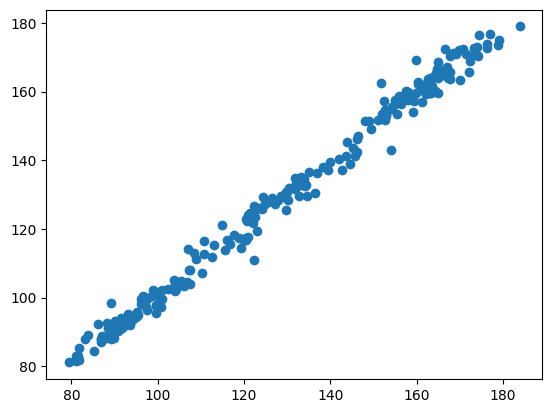

In [25]:
plt.scatter(y_test , prediction)

Explaination
1) We can see the scatter plot of the y_test and prediction above
2) It shows us that the test value and predicted values are linear and does not have much difference

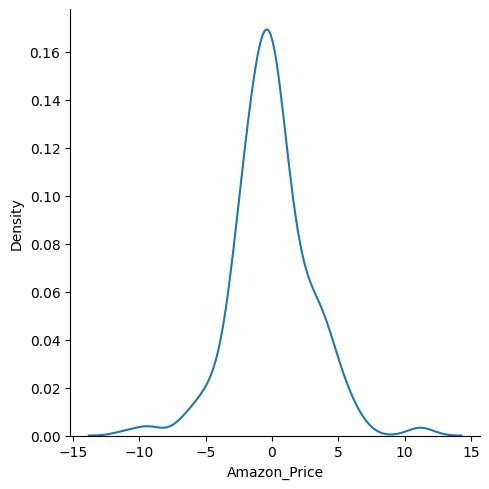

In [26]:
sns.displot(residuals , kind = 'kde')

Explaination
1) The curve is normally distributed 
2) And the outlies are present in a small amount which can be seen through the tail
3) In a very rare case the model prediction will be far as 10 to 15 units from original

In [27]:
# Using a portion of the testing data as recent data for validation.
validation_size = 0.8  # 80% for validation
final_test_size = 0.2  # 30% for final testing

Explaination.  
1) We have defined two variables with the sizes 80-20 so our test data which is (X_test) and is unseen data for our model will be created.
2) validation will be done on 80 % of the data
3) Testing will be done on the 20% of the remaining data 
   

In [28]:
#  Using the portion of the testing data as recent data for validation
num_validation_samples = int(len(X_test) * validation_size)

# Split the data
X_val = X_test[:num_validation_samples]  # First 70% for validation
y_val = y_test[:num_validation_samples]

X_final_test = X_test[num_validation_samples:]  # Remaining 30% for final testing
y_final_test = y_test[num_validation_samples:]

# Print the shapes of the new sets
print("Validation set shape:", X_val.shape)
print("Final test set shape:", X_final_test.shape)

Validation set shape: (199, 39)
Final test set shape: (50, 39)


Explaination.  
1) In the num validation we have converted our X_test to the integer data type so that we can multiply its len with validation to obtain our trainin data (validation size).
2) The purpose behind converting it to the integer is to obtain our 80% validation data. If we did not do the same, then our X_test data will get multiply by by our validation size.
3) example: if out X_test is 10 and our validation size is 0.8 which is 80% then X_test in result will be 8.0.
4) Then in the next step we have created two variables for our validation(training).
5) Then we have created two variable for the testing.


In [29]:
# Predict on recent data and evaluate the model using MAE and RMSE.
val_predictions = best_model[1].predict(X_val)

mae = mean_absolute_error(y_val, val_predictions)


rmse = root_mean_squared_error(y_val, val_predictions)

#  Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 2.0309095477386987
Root Mean Squared Error (RMSE): 2.8434387011921323


Explaination.
1) Here we are predicting the the values based on our recent training on unseen data.
2) Mae and Rmse is being calculated to check our models performance.
3) If the results of mae and rmse is low then our model is performing good.  

In [30]:
# Analyzing the coefficients of the Random Forest regression model to determine feature importance.
feature_importances = best_model[1].feature_importances_
feature_names = X.columns  # Assuming X is your feature DataFrame

# Step 2: Create a DataFrame for feature importance
important_ftr = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Step 3: Sort by importance to identify the most important features
important_ftr = important_ftr.sort_values(by='Importance', ascending=False)
# importance_df


Explaination.
1) We are analyzing the most important feature  on which  our regression model is trained.
2) We are assigning the variable X which is has the training data and not the target feature to our feature name.
3) Then we are defining our importance df as a Data Frame  with 2 column in which it will store the values.
4) Then we are sorting our importance df as descending so that it will show the most important features at the top.  

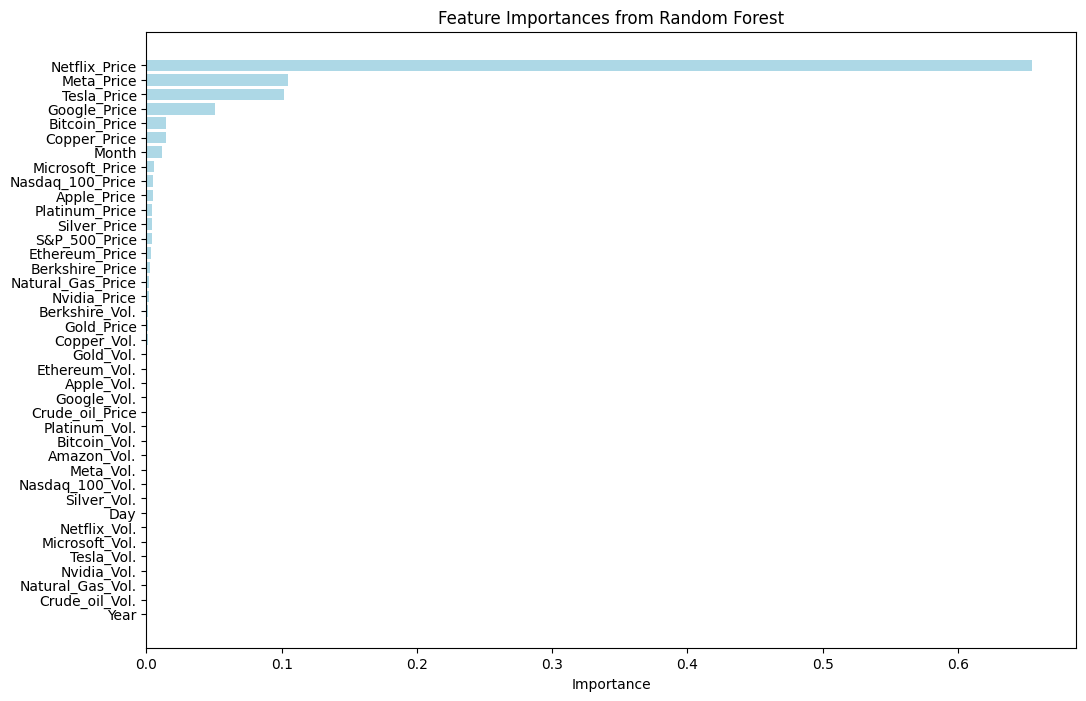

In [31]:
# Visualize the feature importances using a bar plot.
plt.figure(figsize=(12,8))
plt.barh(important_ftr['Feature'], important_ftr['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.show()

Explaination.  
1) We are creating a bar plot to see the visualization of our important features.
2) Netflix, Tesla, Meta, Google are top 4 important features.
3) From the visuals we can clearly understand that if we drop  9 to 10 features from down then also our model will work good.  

In [32]:
import joblib
# Save the model
joblib.dump(best_model[1], 'hubble_model.pkl')

['hubble_model.pkl']

In [33]:
model = joblib.load('hubble_model.pkl')
model

RandomForestRegressor()

In [35]:
# Making predictions based on X_test
predictions = model.predict(X_test)

# Comparing predictions to the actual values in y_test
for prediction, actual in zip(predictions, y_test):
    print(f"Predicted: {prediction}, Actual: {actual}")


Predicted: 129.61600000000007, Actual: 128.63
Predicted: 94.3475, Actual: 93.1
Predicted: 160.15999999999994, Actual: 161.59
Predicted: 170.29059999999993, Actual: 167.74
Predicted: 118.09349999999999, Actual: 117.56
Predicted: 95.23659999999994, Actual: 93.08
Predicted: 163.88129999999987, Actual: 167.14
Predicted: 117.05619999999999, Actual: 119.68
Predicted: 151.7344000000001, Actual: 151.12
Predicted: 138.88560000000004, Actual: 144.6
Predicted: 162.80059999999995, Actual: 162.95
Predicted: 172.57979999999995, Actual: 176.28
Predicted: 116.78760000000005, Actual: 116.15
Predicted: 123.9218, Actual: 120.97
Predicted: 82.88989999999998, Actual: 81.11
Predicted: 129.1113999999999, Actual: 129.79
Predicted: 159.30800000000002, Actual: 162.05
Predicted: 130.3983, Actual: 136.45
Predicted: 110.94009999999999, Actual: 122.35
Predicted: 149.0140000000001, Actual: 149.33
Predicted: 115.59289999999996, Actual: 116.75
Predicted: 89.60629999999998, Actual: 89.53
Predicted: 89.68719999999999, A

Explaination 
1) Here we can see the actual and the predicted values and by looking that its clear that our model is performing well
2) The zip function is used to iterate our prediction through the both values in the zip